This notebooks looks at the transcendental equation for the pork tenderloin solver

In [6]:
from scipy.special import jv
import matplotlib.pyplot as plt
from ma
import numpy as np

In [28]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

N = 500

In [29]:
def transcendental_equation(beta: float, nusselt_number:float) -> float:
    """Yields the residual of the transcendental equation"""
    residual = beta * jv(1, beta/2.0) - nusselt_number * jv(0, beta/2.0)
    return residual

In [41]:
nusselt_numbers = 5.0 * np.logspace(-2, 2, N)
betas = np.linspace(0, 100, N)
nusselt_numbers, betas = np.meshgrid(nusselt_numbers, betas)
nusselt_numbers[0, :3], betas[:3, 0]

(array([0.05      , 0.05093145, 0.05188025]),
 array([0.       , 0.2004008, 0.4008016]))

Text(0, 0.5, '$\\beta$')

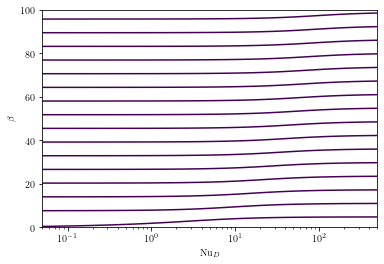

In [47]:
residuals = transcendental_equation(betas, nusselt_numbers)
contour_set = plt.contour(nusselt_numbers, betas, residuals, levels=[0])
plt.xscale("log")
plt.xlabel(r"$\mathrm{Nu}_D$")
plt.ylabel(r"$\beta$")

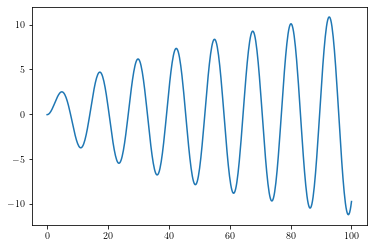

In [48]:
plt.plot(betas[:, 0], residuals[:, 0])

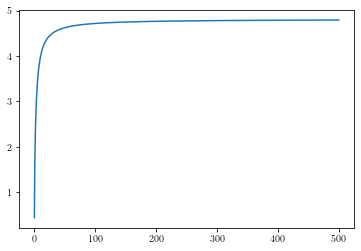

In [57]:
paths = contour_set.collections[0].get_paths()
nud_contour, beta_contour = paths[0].vertices[:, 0], paths[0].vertices[:, 1]
plt.plot(nud_contour, beta_contour)

Text(0, 0.5, '$\\beta$')

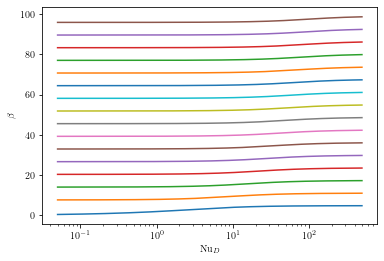

In [61]:
for path in paths:
    nud = path.vertices[:, 0]
    beta = path.vertices[:, 1]
    plt.plot(nud, beta)

plt.xscale("log")
plt.xlabel(r"$\mathrm{Nu}_D$")
plt.ylabel(r"$\beta$")